In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

data = pd.read_csv('vgsales.csv')
print(data.isnull().sum().sum())
data.dropna(inplace=True)
print(data.isnull().sum().sum())
nintendo = data.loc[data['Publisher']=='Nintendo']
nintendo

329
0


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [15]:
genre = nintendo['Genre'].drop_duplicates().tolist()
print(genre)
# genre_sum = nintendo.groupby(['Genre']).size().sort_values(ascending=False).tolist()
genre_sum = nintendo.groupby(['Genre']).size().tolist()
print(genre_sum)

colors = ['r', 'y', 'g','c','w','m','k','b','purple','gray','brown','pink','orange'] 

plt.pie(genre_sum, labels = genre, colors=colors,  
        startangle=90, shadow = True, explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0,0), 
        radius = 2.5, autopct = '%1.1f%%',center=(0,2)) 
plt.title("Nintendo game genre distribution",pad='180')
plt.show() 

['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Fighting', 'Action', 'Adventure', 'Strategy']
[78, 35, 18, 100, 111, 74, 37, 105, 24, 28, 55, 31]


TypeError: pie() got an unexpected keyword argument 'font_dict'

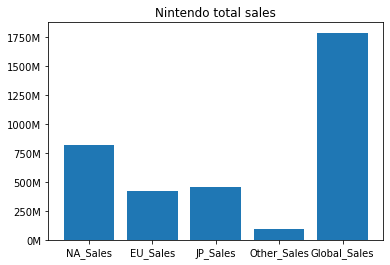

In [3]:
NA_Sales = nintendo["NA_Sales"].sum()
EU_Sales = nintendo["EU_Sales"].sum()
JP_Sales = nintendo["JP_Sales"].sum()
Other_Sales = nintendo["Other_Sales"].sum()
Global_Sales = nintendo["Global_Sales"].sum()

x = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
sales = [NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales]

def millions(x, pos):
    return '%dM' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, sales)
plt.xticks(x, x)
plt.title("Nintendo total sales")
plt.show()

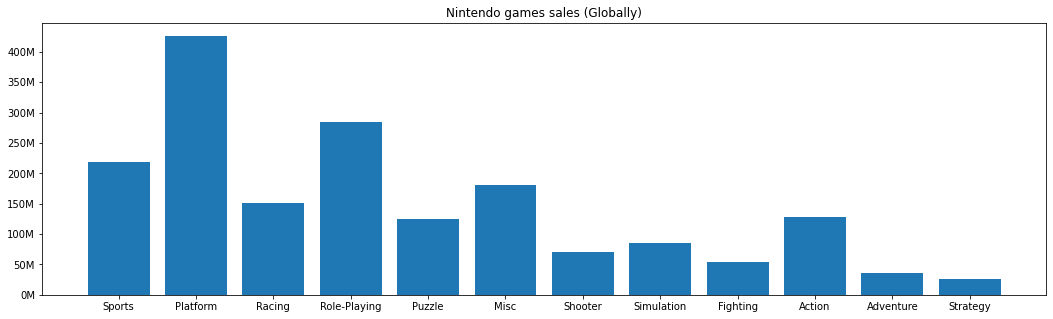

In [4]:
genre_sales =[]
for x in genre:
    total = nintendo.loc[nintendo['Genre']==x]['Global_Sales'].sum()
    genre_sales.append(total)

fig, ax = plt.subplots(figsize=(18,5))
ax.yaxis.set_major_formatter(formatter)
plt.bar(genre, genre_sales)
plt.xticks(genre, genre)
plt.title("Nintendo games sales (Globally)")
plt.show()

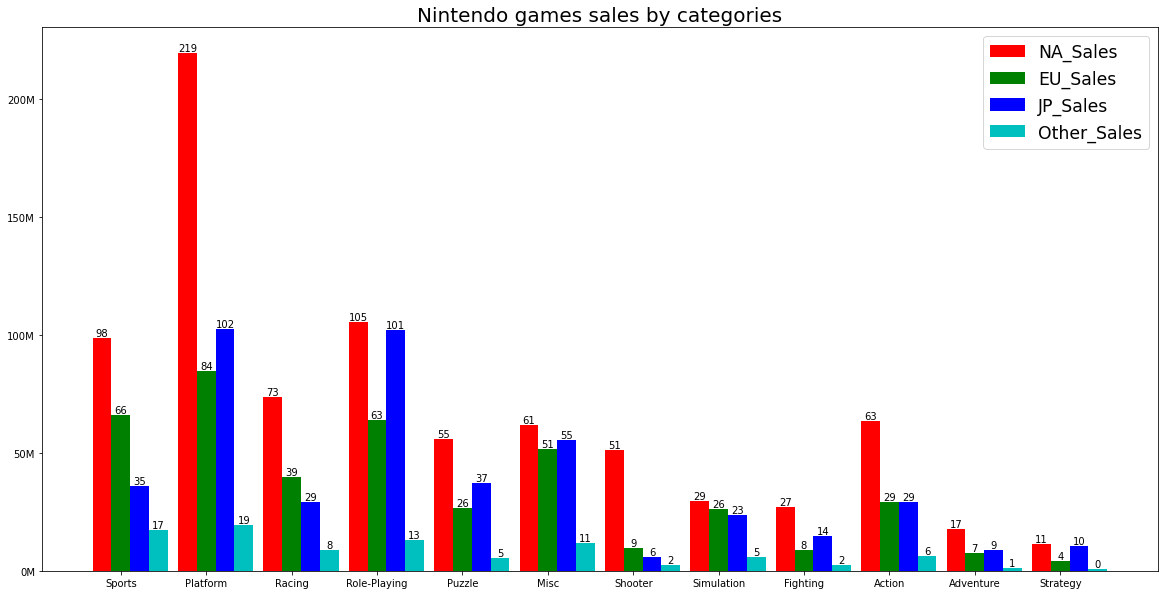

In [5]:
genre_sales_na =[]
genre_sales_eu =[]
genre_sales_jp =[]
genre_sales_other =[]
for x in genre:
    genre_sales_na.append(nintendo.loc[nintendo['Genre']==x]['NA_Sales'].sum())
    genre_sales_eu.append(nintendo.loc[nintendo['Genre']==x]['EU_Sales'].sum())
    genre_sales_jp.append(nintendo.loc[nintendo['Genre']==x]['JP_Sales'].sum())
    genre_sales_other.append(nintendo.loc[nintendo['Genre']==x]['Other_Sales'].sum())

N = 12
ind = np.arange(N)  # the x locations for the groups
width = 0.22       # the width of the bars

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

yvals = genre_sales_na
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = genre_sales_eu
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = genre_sales_jp
rects3 = ax.bar(ind+width*2, kvals, width, color='b')
ovals = genre_sales_other
rects4 = ax.bar(ind+width*3, ovals, width, color='c')

ax.yaxis.set_major_formatter(formatter)
ax.set_xticks(ind+width)
ax.set_xticklabels( genre )
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0]), ('NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales') ,fontsize='xx-large')


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
plt.title("Nintendo games sales by categories",fontsize=20)
plt.show()


In [3]:
nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


1983.0
2016.0
[1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]


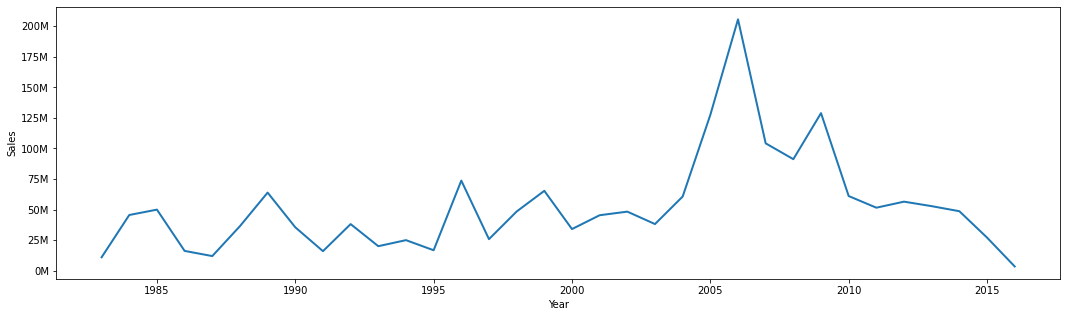

In [7]:
print(nintendo['Year'].min())
print(nintendo['Year'].max())
year_list = nintendo['Year'].drop_duplicates().sort_values(ascending=True).tolist()
print(year_list)
year_sales=[]
for x in year_list:
    year_sales.append(nintendo.loc[nintendo['Year'] ==x]['Global_Sales'].sum())

fig, ax = plt.subplots(figsize=(18,5))
ax.yaxis.set_major_formatter(formatter)
plt.plot(year_list,year_sales,linewidth=2.0)
plt.xlabel('Year')
plt.ylabel('Sales')



plt.show()


In [6]:
nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'GC', 'WiiU']
[390.34, 183.96999999999997, 229.06, 349.1, 96.84000000000002, 112.0, 156.45, 129.61999999999998, 79.15, 57.9]


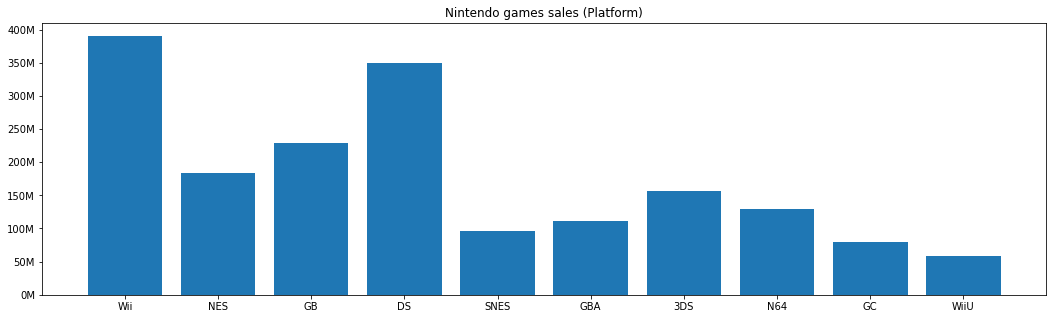

In [10]:
platform = nintendo['Platform'].drop_duplicates().tolist()
platform_sales=[]
for x in platform:
    platform_sales.append(nintendo.loc[nintendo['Platform'] ==x]['Global_Sales'].sum())
print(platform)
print(platform_sales)

fig, ax = plt.subplots(figsize=(18,5))
ax.yaxis.set_major_formatter(formatter)
plt.bar(platform, platform_sales)
plt.xticks(platform, platform)
plt.title("Nintendo games sales (Platform)")
plt.show()